In [1]:
%%html
<link rel="stylesheet" type="text/css" href="rise.css" />

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]

# Regularization
**Learning goals**
- You will appreciate how correlations can influence a linear regression.
- You will be able to perform ridge and lasso regression.
- You will appreciate how regularization can prevent poorly constrained model parameters from exploding.
- You will appreciate how lasso regularization can identify model parameters with little to no impact.
- You understand how to choose (tune) the regularization hyperparameter.

In [3]:
# Meseares of various features and diabetes disease progression for 442 patients.
# Available at https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt
df = pd.read_csv('data/diabetes.csv')
df

,AGE,SEX,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU,DIS
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [4]:
names = list(df.columns.values)
features = names[:-1]
target = names[-1]

print(features)
print(target)

['AGE', 'SEX', 'BMI', 'BP', 'TC', 'LDL', 'HDL', 'TCH', 'LTG', 'GLU']
DIS


In [5]:
X = df.loc[:,features].to_numpy()
y = df[target].to_numpy()

X.shape, y.shape

((442, 10), (442,))

In [6]:
def standardize(data):
    return (data - X.mean(axis=0)) / X.std(axis=0)

In [7]:
Xs = standardize(X)

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xs, y);

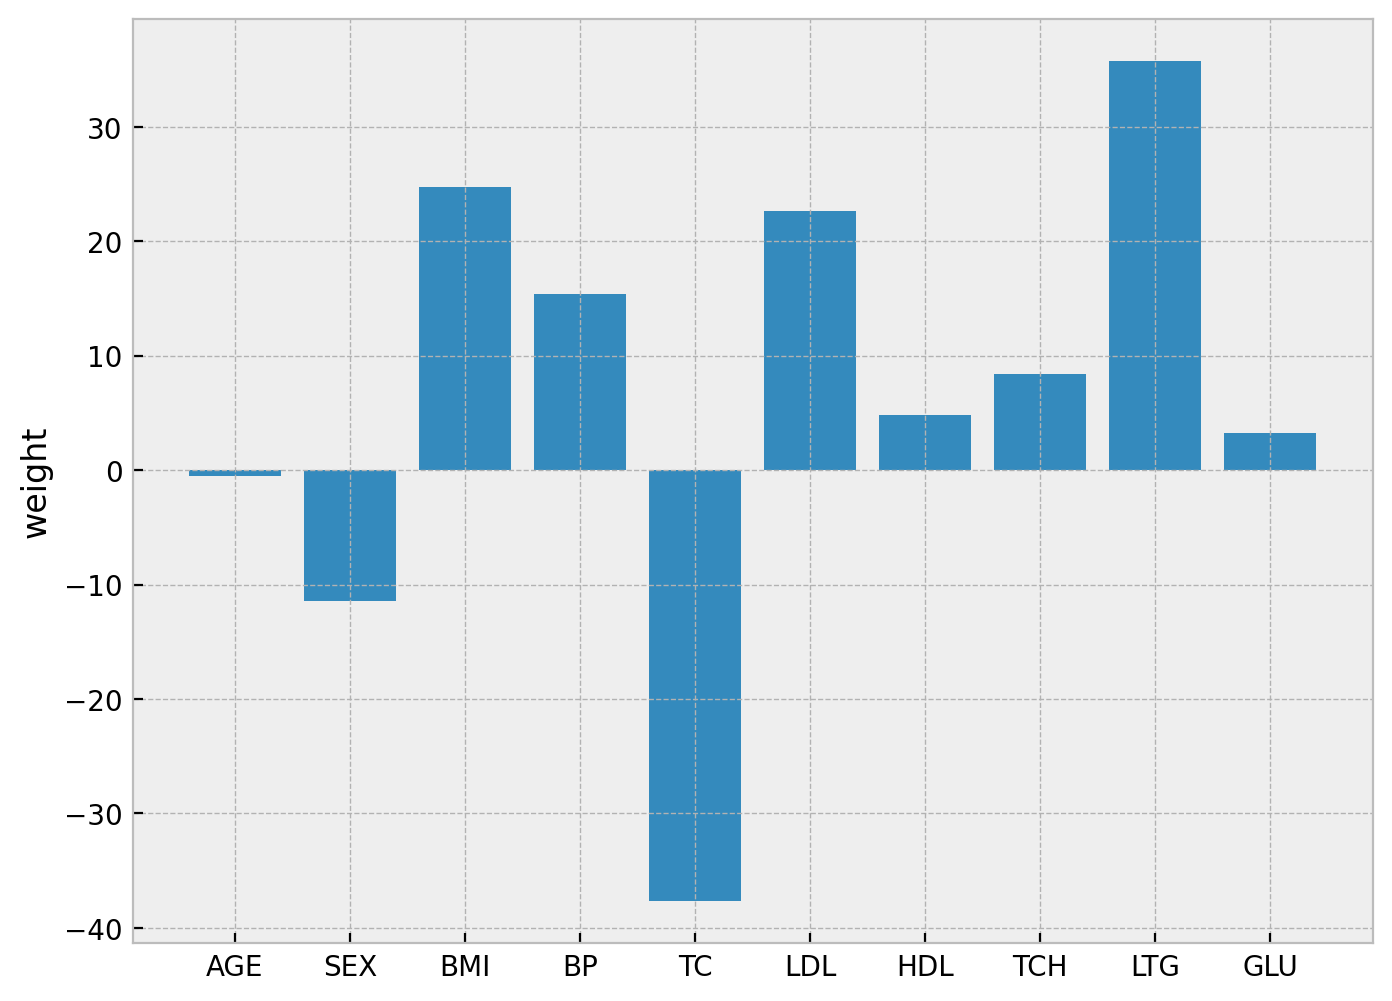

In [9]:
n = len(model.coef_)
plt.bar(range(n), model.coef_)
plt.xticks(range(n), features)
plt.ylabel('weight');

What if we try training the model on either the first or last 100 patients only?

In [10]:
model1 = LinearRegression()
model1.fit(Xs[:100], y[:100])

model2 = LinearRegression()
model2.fit(Xs[-100:], y[-100:]);

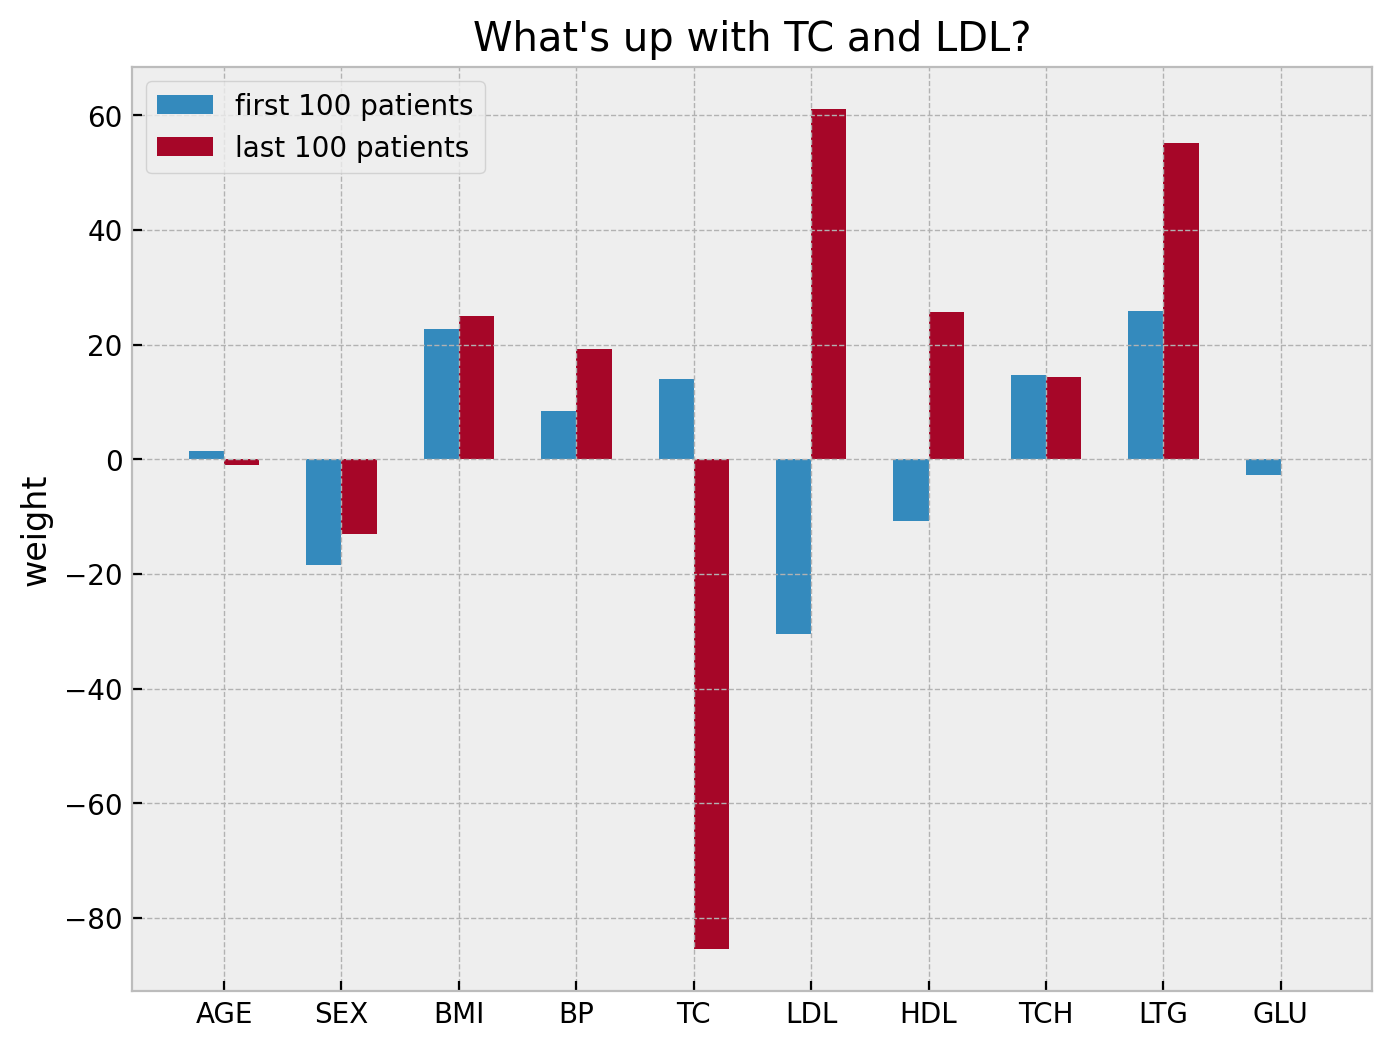

In [11]:
# first vs last 100 patients
n = len(model1.coef_)
plt.bar(np.arange(n)-0.15, model1.coef_, width=0.3, label='first 100 patients')
plt.bar(np.arange(n)+0.15, model2.coef_, width=0.3, label='last 100 patients')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title("What's up with TC and LDL?")
plt.legend();

Notice that TC and LDL are highly correlated.

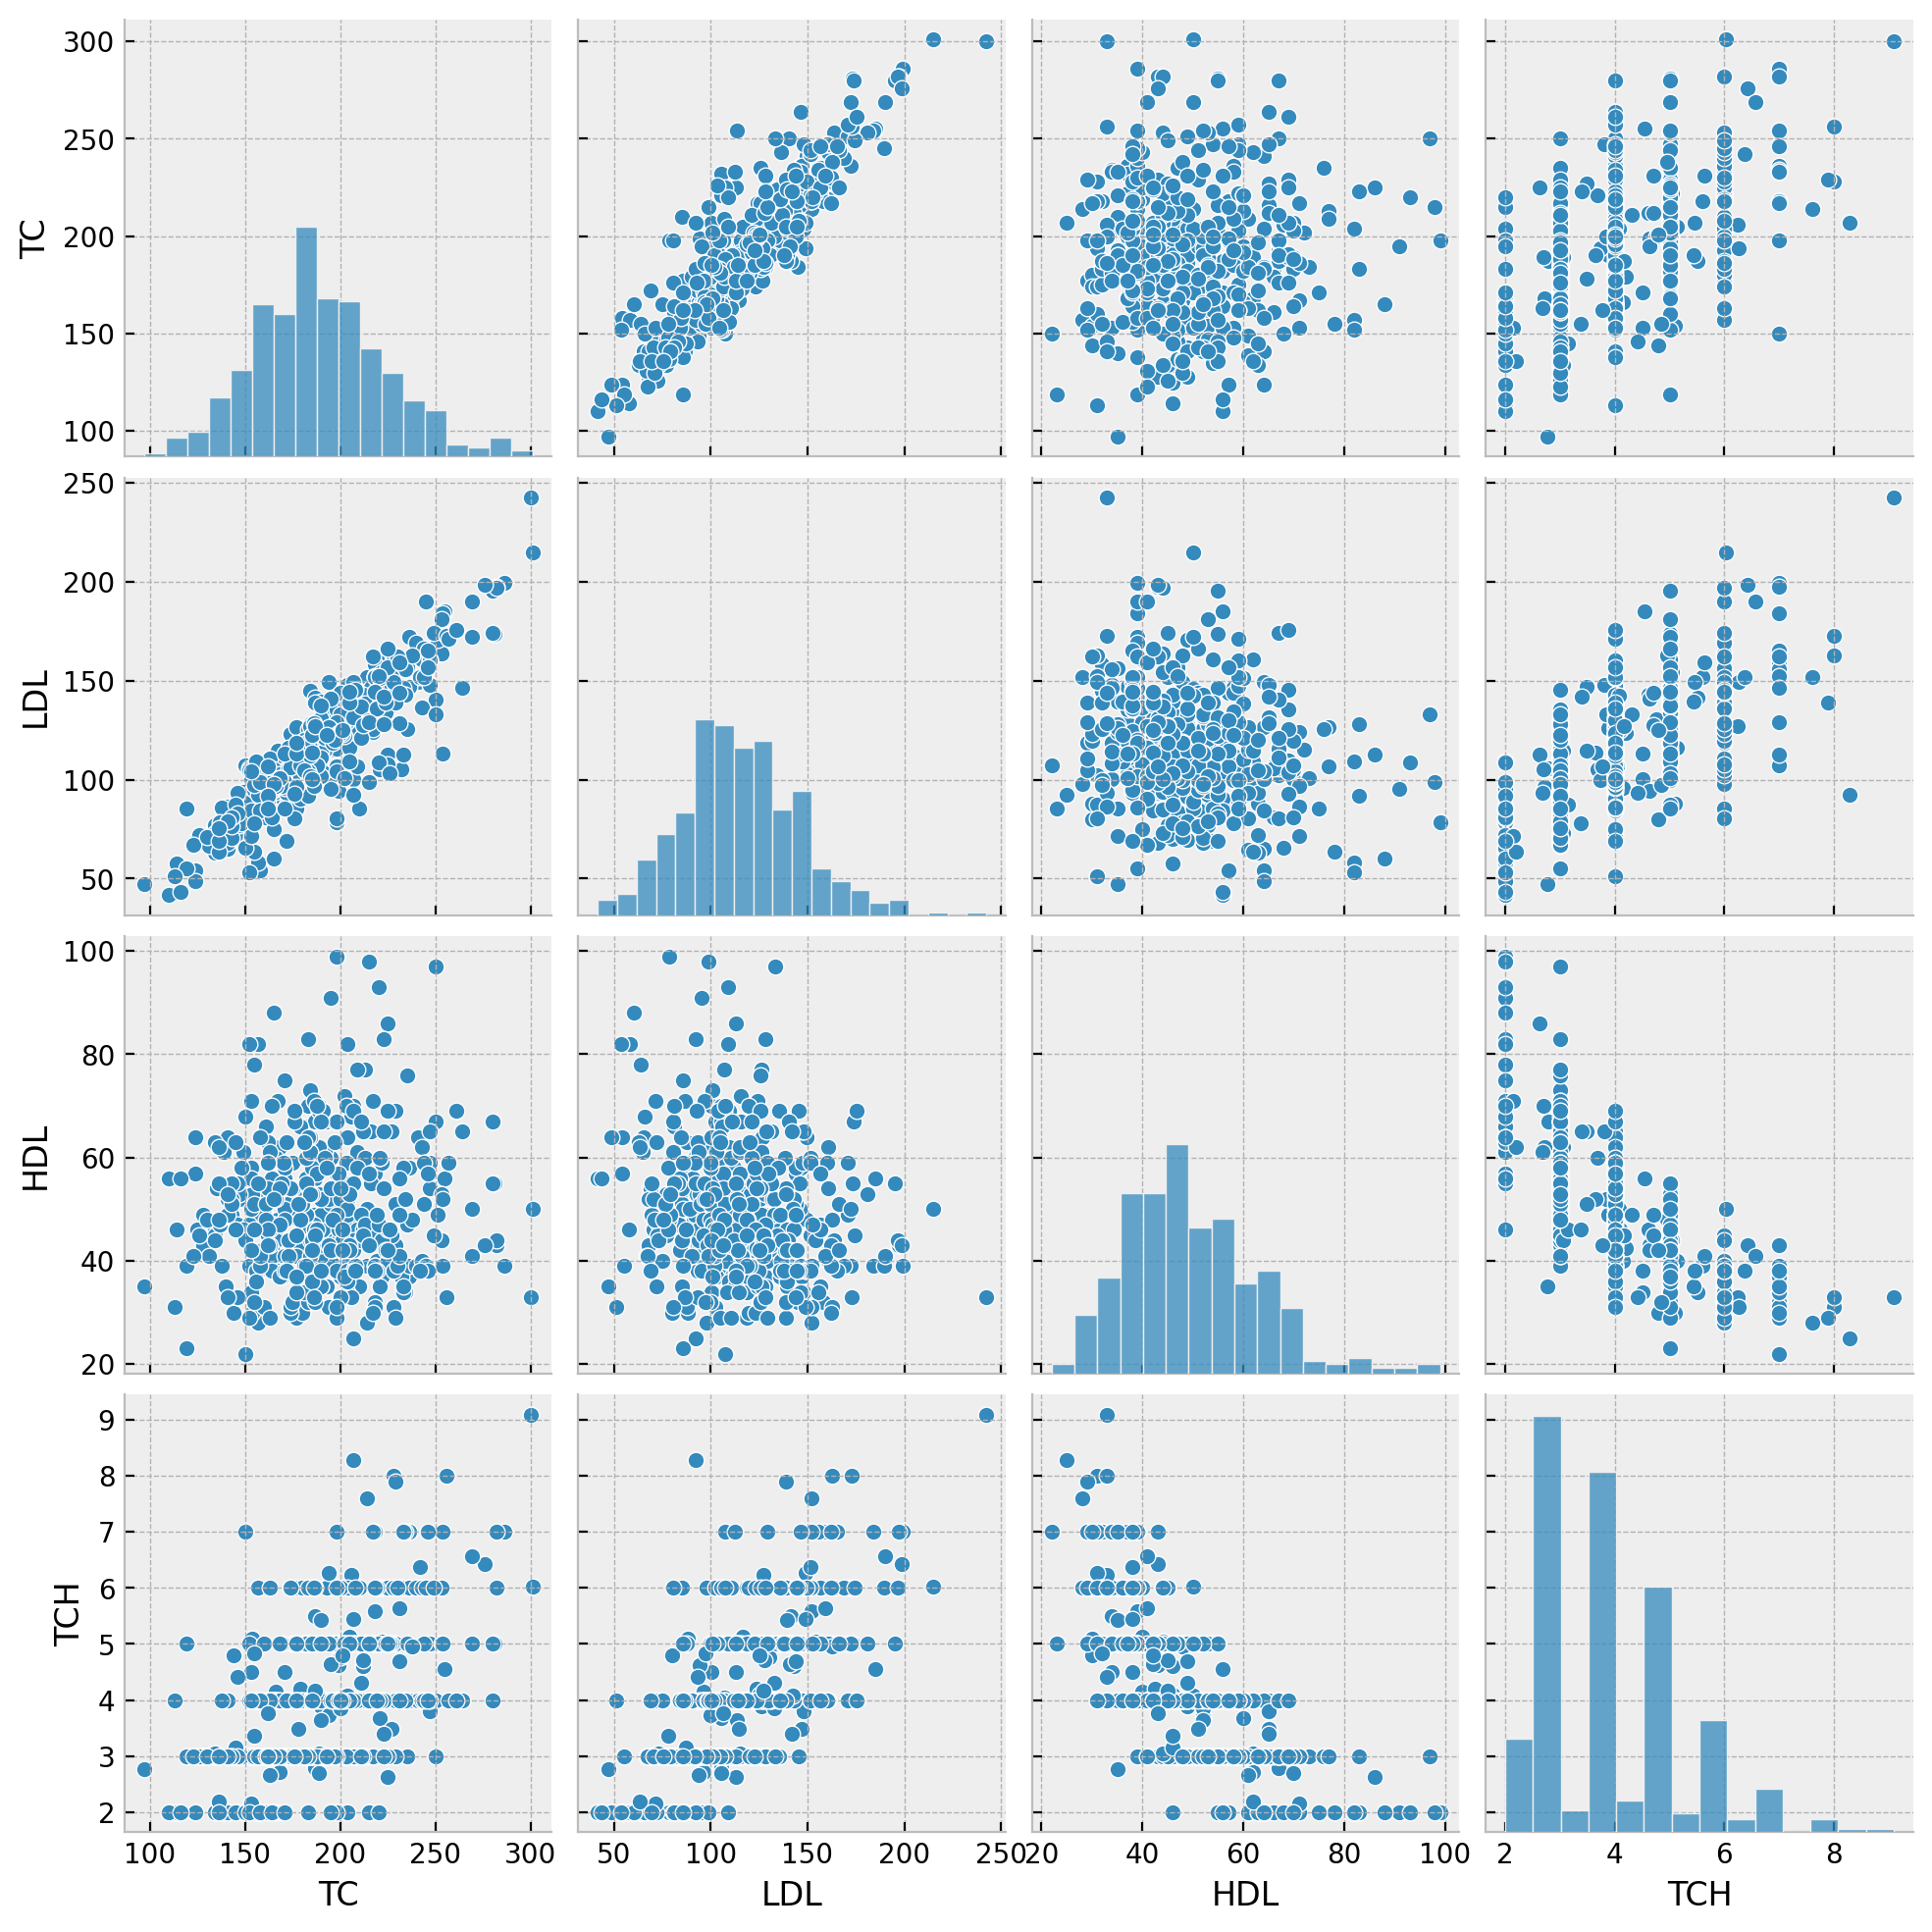

In [12]:
import seaborn as sns

sns.pairplot(df[['TC', 'LDL', 'HDL', 'TCH']]);

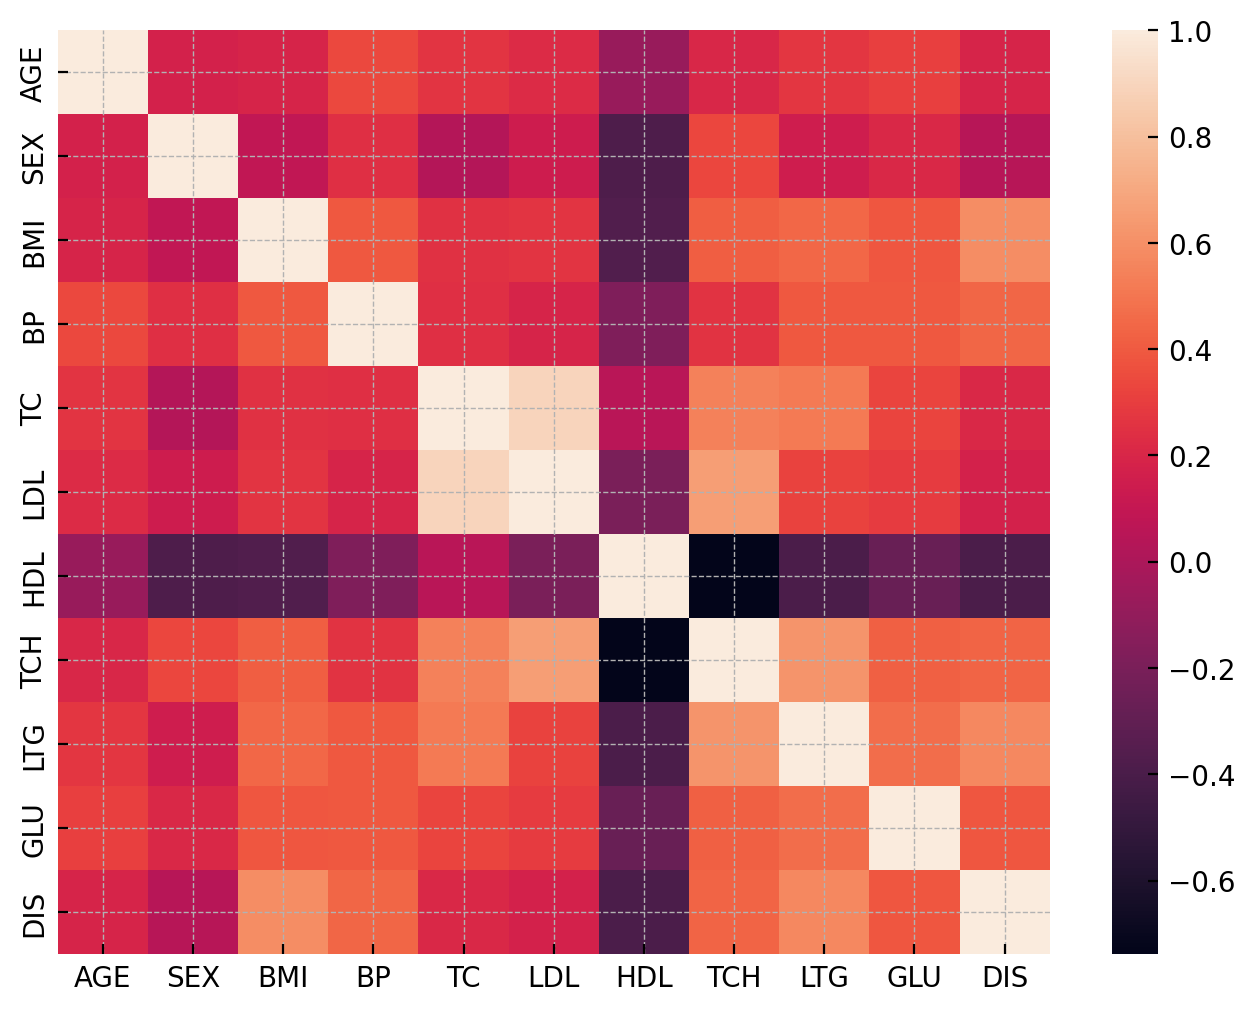

In [13]:
sns.heatmap(df.corr());

Let's train the model on either the first or last 100 patients, but exclude TC from the list of predictors.

In [14]:
# convert to numpy array so we can use logical mask indexing
features = np.array(features)
features

array(['AGE', 'SEX', 'BMI', 'BP', 'TC', 'LDL', 'HDL', 'TCH', 'LTG', 'GLU'],
      dtype='<U3')

In [15]:
not_TC = (features != "TC")
not_TC

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [16]:
Xs.shape, Xs[:,not_TC].shape

((442, 10), (442, 9))

Let's train the model on either the first or last 100 patients, but exclude TC from the list of predictors.

In [17]:
model1_no_TC = LinearRegression()
model1_no_TC.fit(Xs[:100,not_TC], y[:100])

model2_no_TC = LinearRegression()
model2_no_TC.fit(Xs[-100:,not_TC], y[-100:]);

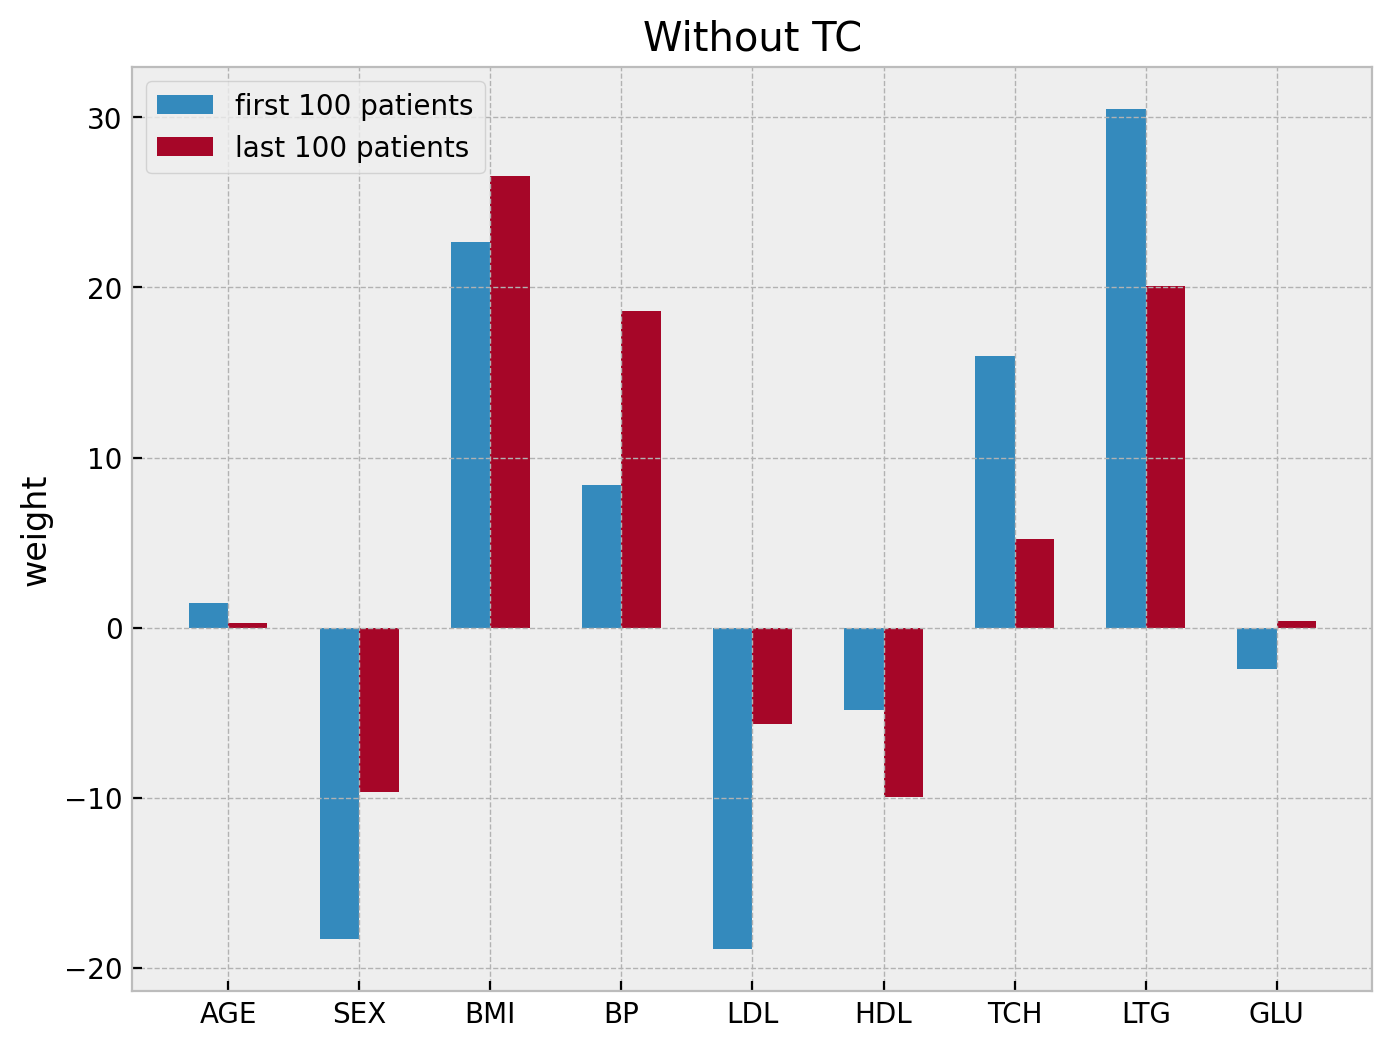

In [18]:
# first vs last 100 patients without TC
n = len(model1_no_TC.coef_)
plt.bar(np.arange(n)-0.15, model1_no_TC.coef_, width=0.3, label='first 100 patients')
plt.bar(np.arange(n)+0.15, model2_no_TC.coef_, width=0.3, label='last 100 patients')
plt.xticks(range(n), features[not_TC])
plt.ylabel('weight')
plt.title('Without TC')
plt.legend();

What about excluding LDL instead of TC?

In [19]:
not_LDL = (features != "LDL")

model1_no_LDL = LinearRegression()
model1_no_LDL.fit(Xs[:100,not_LDL], y[:100])

model2_no_LDL = LinearRegression()
model2_no_LDL.fit(Xs[-100:,not_LDL], y[-100:]);

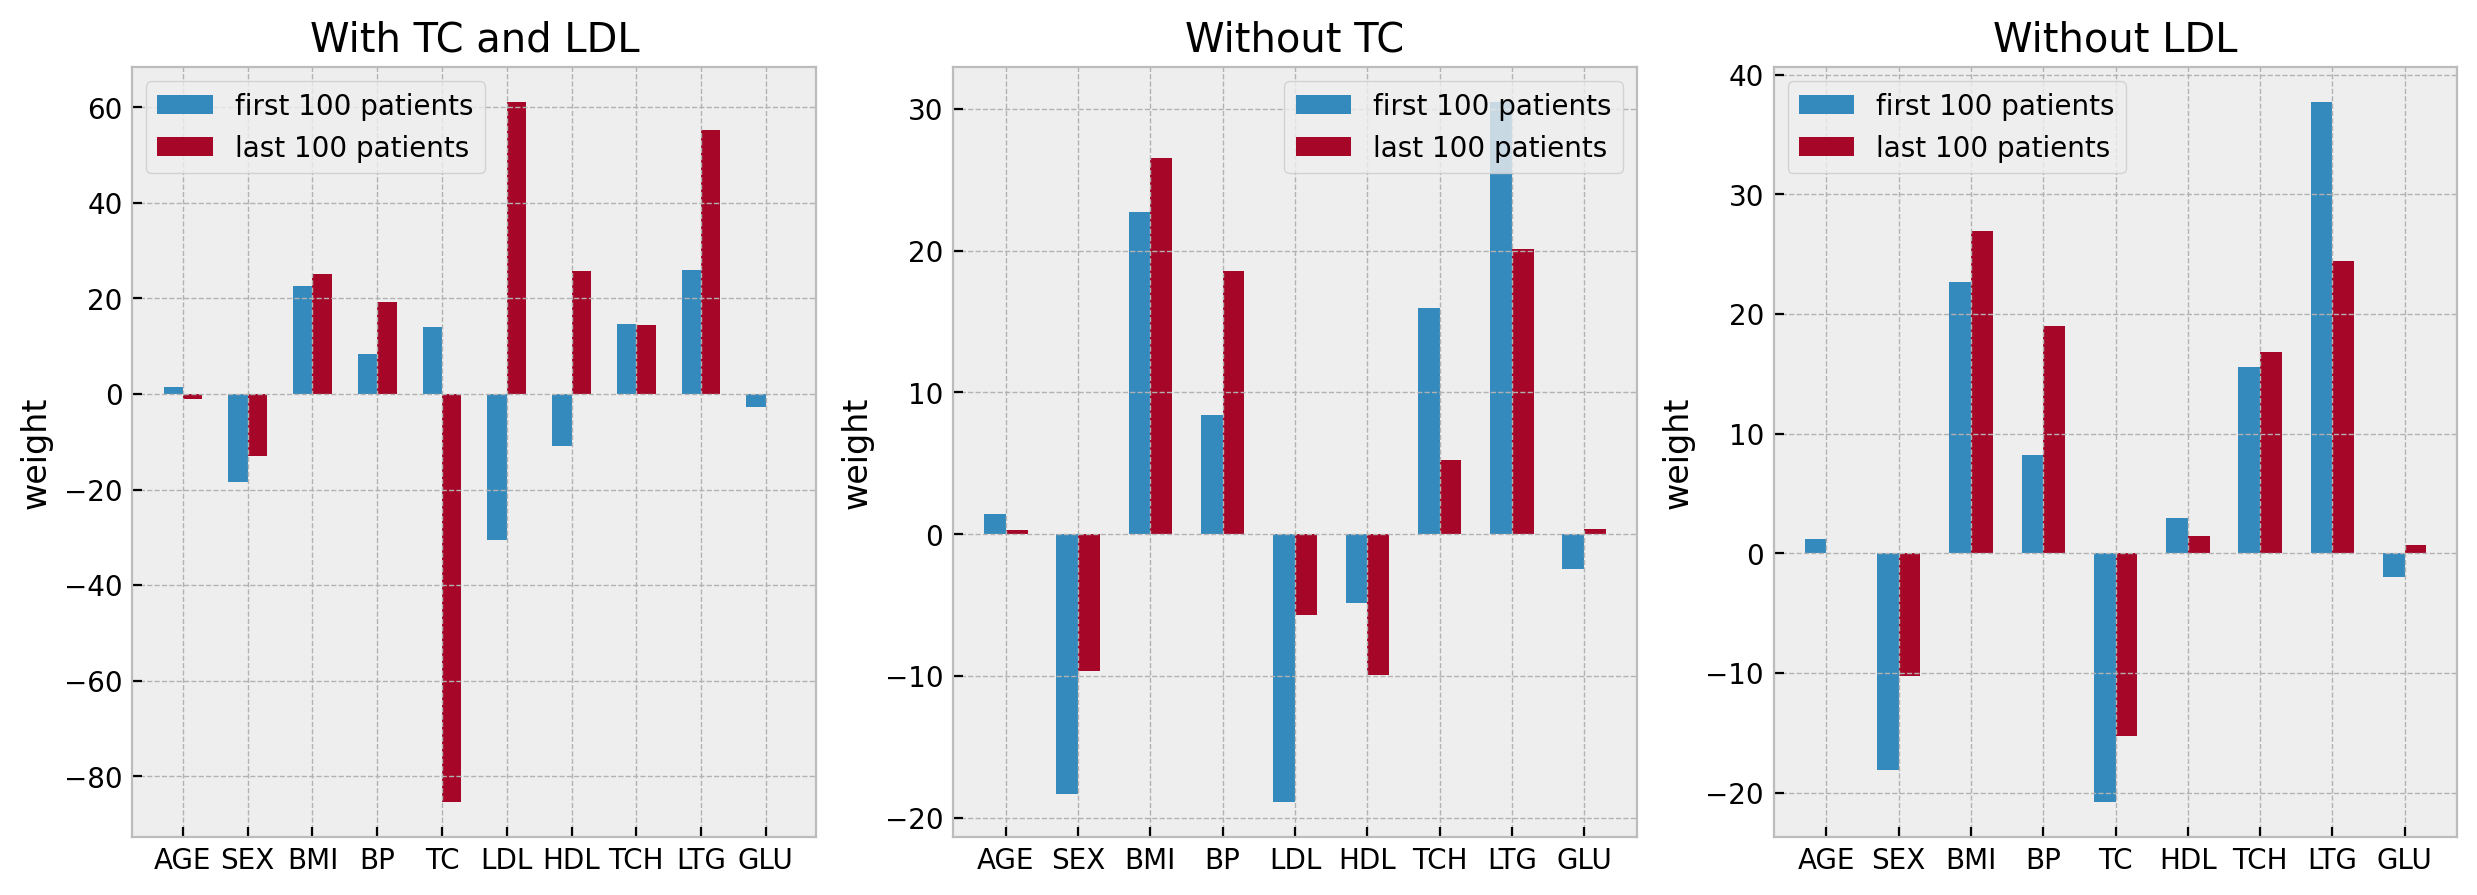

In [20]:
# first vs last 100 patients with and without TC or LDL
plt.figure(figsize=[15,5])
plt.subplot(131)
n = len(model1.coef_)
plt.bar(np.arange(n)-0.15, model1.coef_, width=0.3, label='first 100 patients')
plt.bar(np.arange(n)+0.15, model2.coef_, width=0.3, label='last 100 patients')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title('With TC and LDL')
plt.legend()

plt.subplot(132)
n = len(model1_no_TC.coef_)
plt.bar(np.arange(n)-0.15, model1_no_TC.coef_, width=0.3, label='first 100 patients')
plt.bar(np.arange(n)+0.15, model2_no_TC.coef_, width=0.3, label='last 100 patients')
plt.xticks(range(n), features[not_TC])
plt.ylabel('weight')
plt.title('Without TC')
plt.legend()

plt.subplot(133)
n = len(model1_no_LDL.coef_)
plt.bar(np.arange(n)-0.15, model1_no_LDL.coef_, width=0.3, label='first 100 patients')
plt.bar(np.arange(n)+0.15, model2_no_LDL.coef_, width=0.3, label='last 100 patients')
plt.xticks(range(n), features[not_LDL])
plt.ylabel('weight')
plt.title('Without LDL')
plt.legend();

The overall effect of both TC and LDL should have a weight of ~10-20.

So what's wrong with a model like the one for the last 100 patients that includes both TC and LDL?

The huge opposing weights will lead to high variability in the model's predictions based on random differences in patient TC and LDL measurements.

Thus, the model may not generalize well when making predictions for new patients.

### Linear regression

$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ...$

The residuals are the difference between the data $y$ and the model prediction $\hat{y}$.

The residual sum of squared errors ($RSS$):

$RSS = \sum{{(y - \hat{y})}^2}$

A linear regression model seeks the weights ($\beta_i$) that minimize $RSS$.

### Ridge Regularization

L2 norm $= \sum_i{\beta_i^2}$

A Ridge regression model seeks the weights ($\beta_i$) that minimize $RSS + \alpha \sum_i{\beta_i^2}$.

What effect will this have on the model weights ($\beta_i$)?

Let's try a Ridge regression model with $\alpha = 10$.

In [21]:
from sklearn.linear_model import Ridge

ridge_model1 = Ridge(alpha=10)
ridge_model1.fit(Xs[:100], y[:100])

ridge_model2 = Ridge(alpha=10)
ridge_model2.fit(Xs[-100:], y[-100:]);

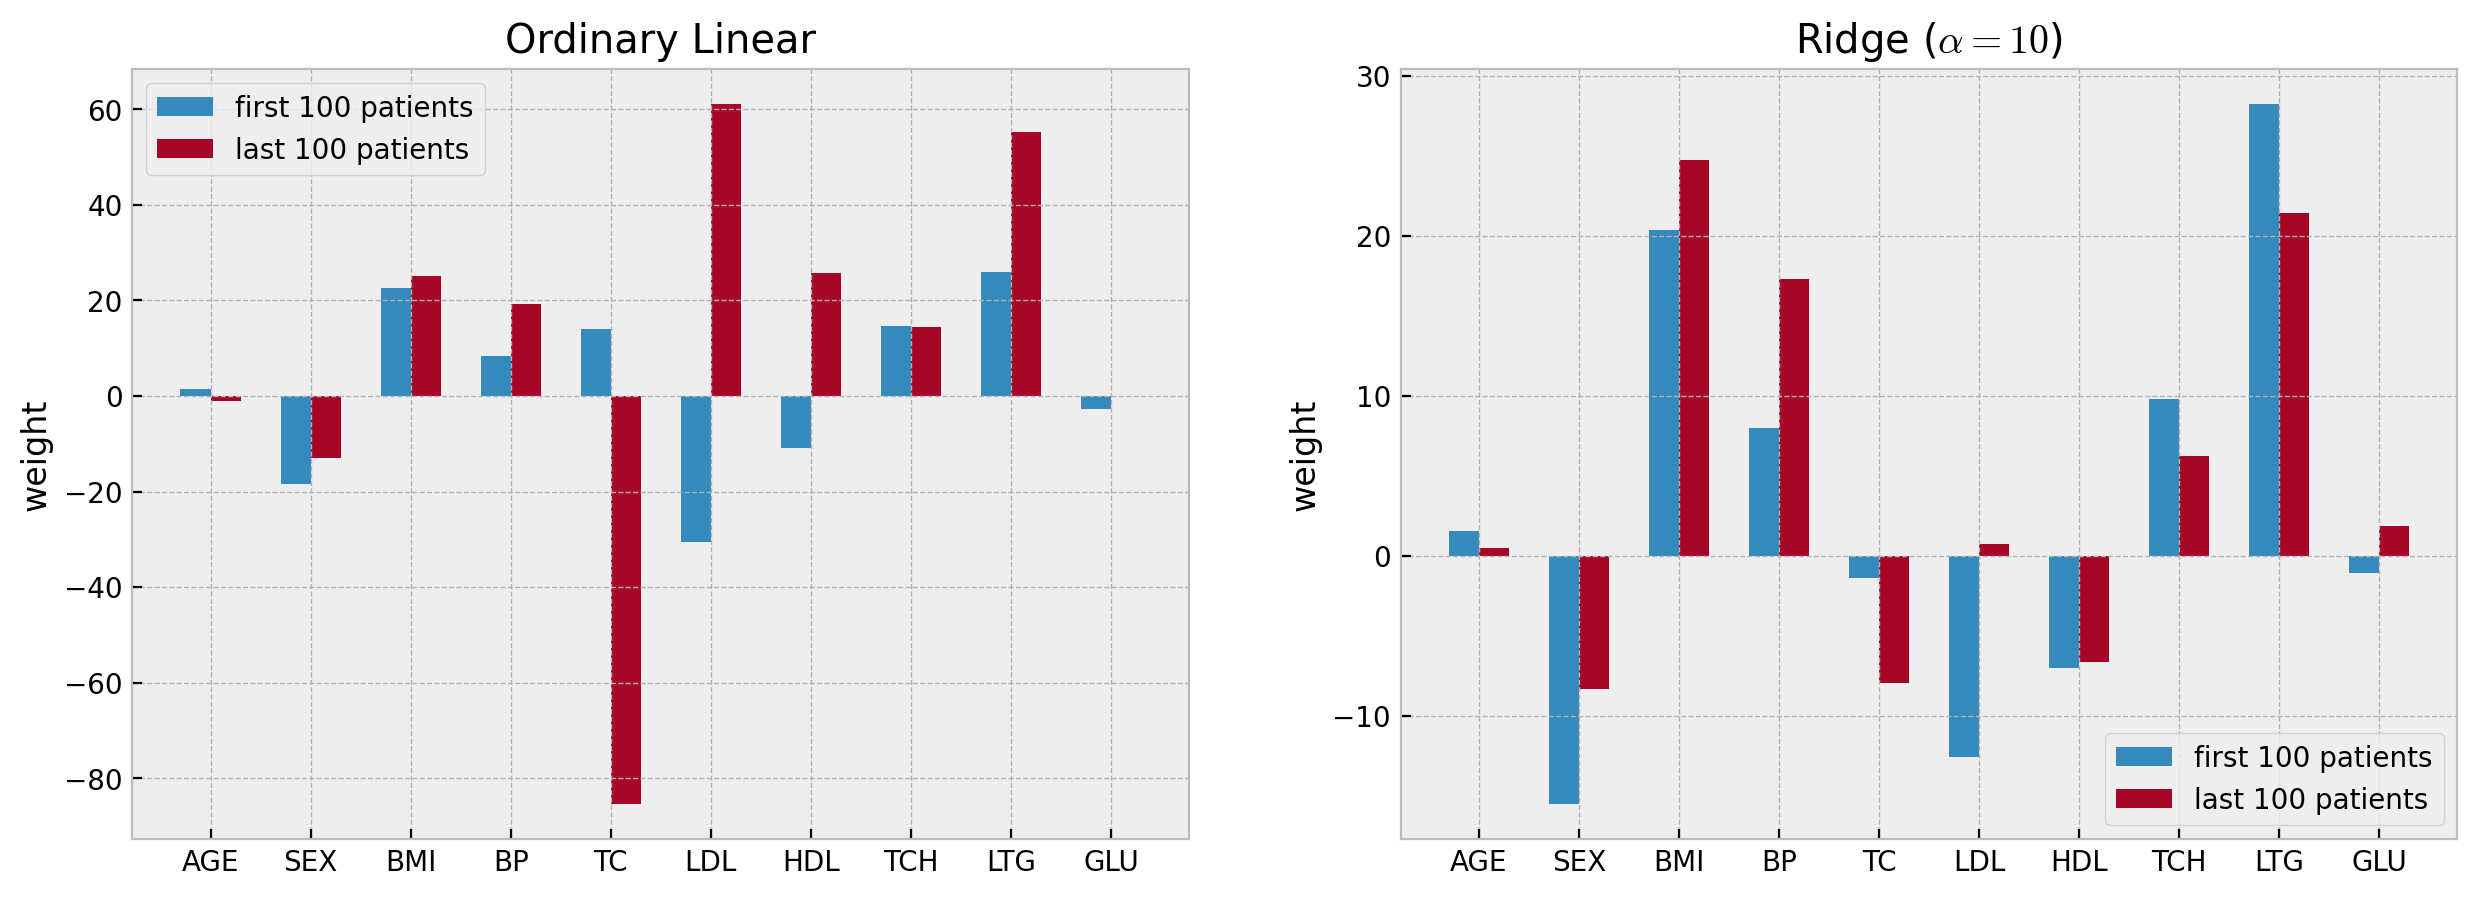

In [22]:
# first vs last 100 patients with and without Ridge model
plt.figure(figsize=[15,5])
plt.subplot(121)
n = len(model1.coef_)
plt.bar(np.arange(n)-0.15, model1.coef_, width=0.3, label='first 100 patients')
plt.bar(np.arange(n)+0.15, model2.coef_, width=0.3, label='last 100 patients')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title('Ordinary Linear')
plt.legend()

plt.subplot(122)
n = len(ridge_model1.coef_)
plt.bar(np.arange(n)-0.15, ridge_model1.coef_, width=0.3, label='first 100 patients')
plt.bar(np.arange(n)+0.15, ridge_model2.coef_, width=0.3, label='last 100 patients')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title(r'Ridge ($\alpha = 10$)')
plt.legend();

Let's compare $\alpha = 1$ vs. $\alpha = 10$.

In [23]:
ols_model = LinearRegression()
ols_model.fit(Xs, y)

ridge_model_a1 = Ridge(alpha=1)
ridge_model_a1.fit(Xs, y)

ridge_model_a10 = Ridge(alpha=10)
ridge_model_a10.fit(Xs, y);

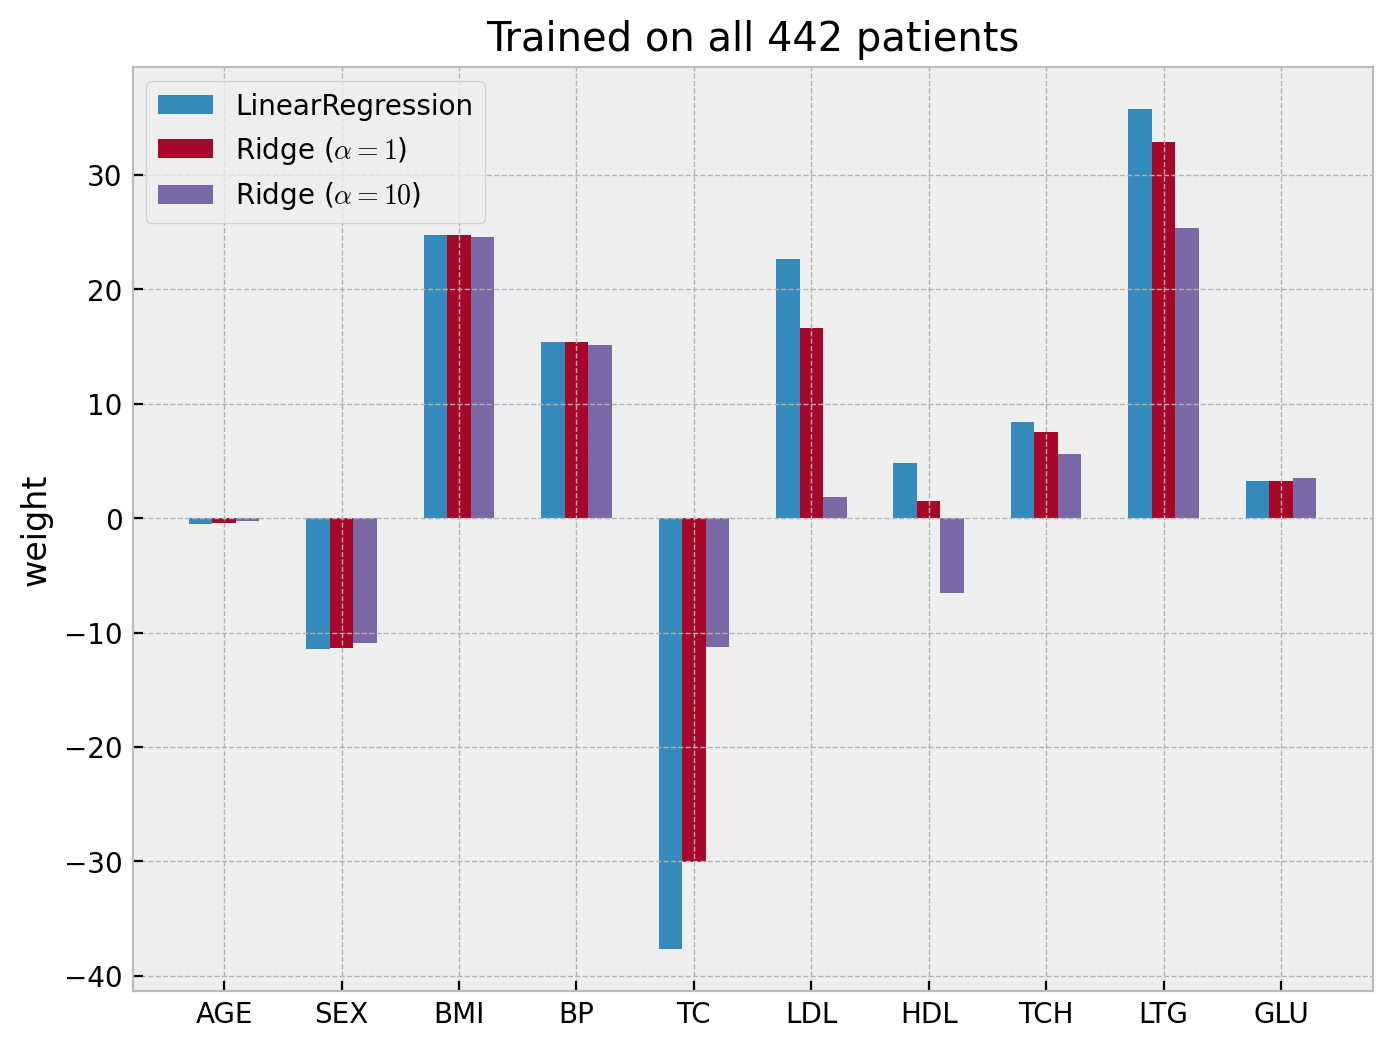

In [24]:
n = len(ols_model.coef_)
plt.bar(np.arange(n)-0.2, ols_model.coef_, width=0.2, label='LinearRegression')
plt.bar(np.arange(n)+0.0, ridge_model_a1.coef_, width=0.2, label=r'Ridge ($\alpha = 1$)')
plt.bar(np.arange(n)+0.2, ridge_model_a10.coef_, width=0.2, label=r'Ridge ($\alpha = 10$)')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title('Trained on all 442 patients')
plt.legend();

### Lasso Regularization

L1 norm $= \sum_i{\left|\beta_i\right|}$

A Lasso regression model seeks the weights ($\beta_i$) that minimize $RSS + \alpha \sum_i{\left|\beta_i\right|}$.

What effect will this have on the model weights ($\beta_i$)?

Let's try a Lasso regression model with $\alpha = 1$.

In [29]:
from sklearn.linear_model import Lasso

lasso_model_a1 = Lasso(alpha=1)
lasso_model_a1.fit(Xs, y);

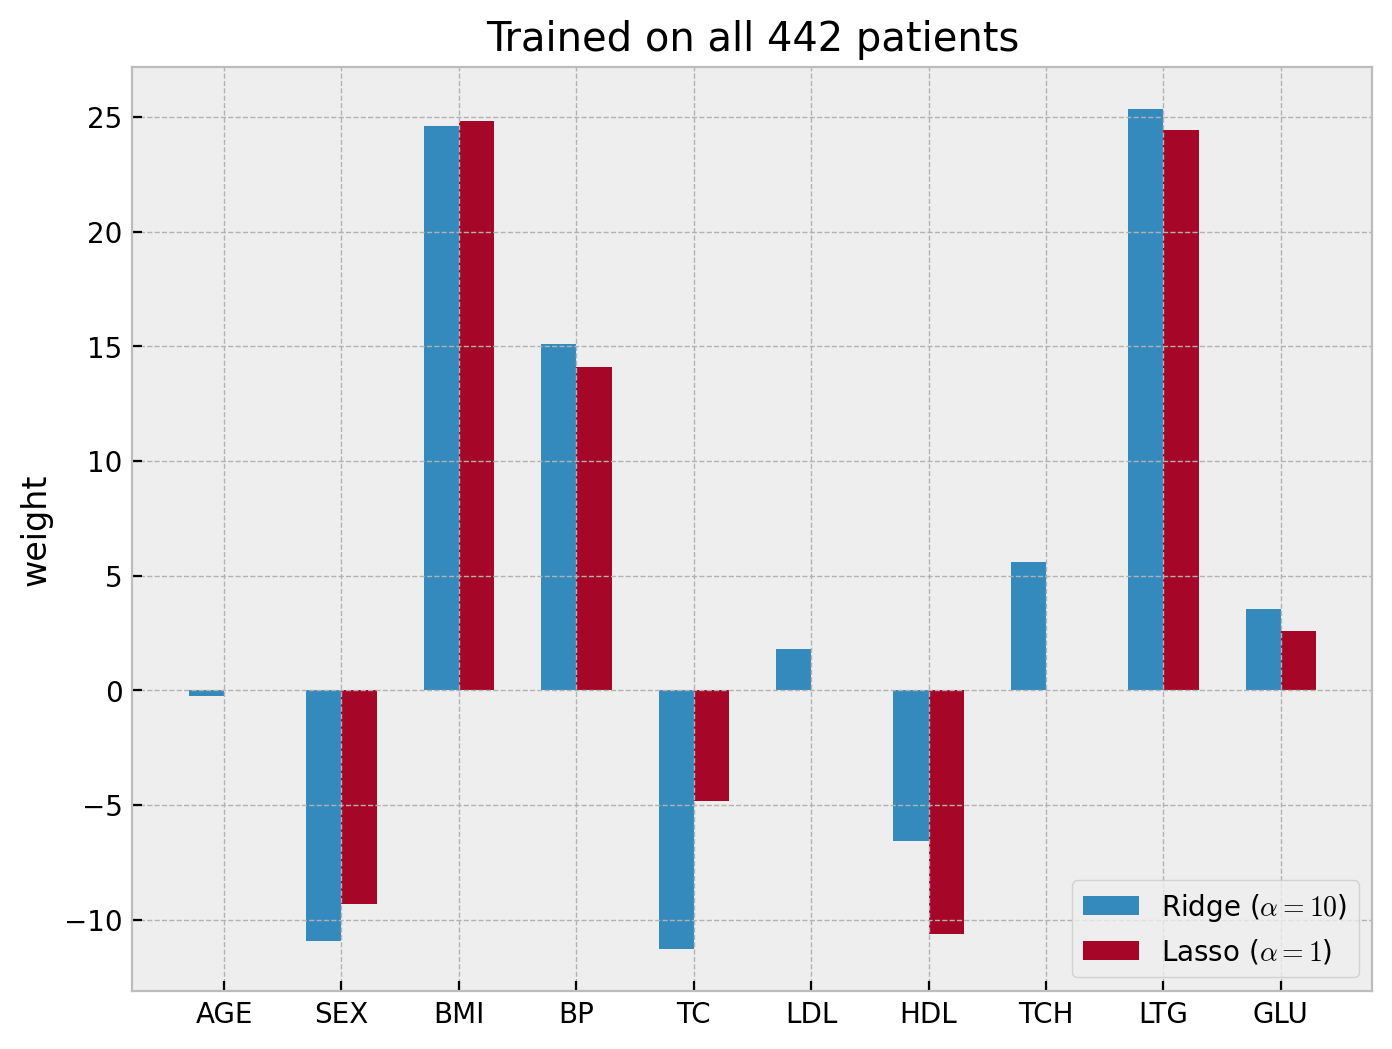

In [30]:
n = len(ridge_model_a10.coef_)
plt.bar(np.arange(n)-0.15, ridge_model_a10.coef_, width=0.3, label=r'Ridge ($\alpha = 10$)')
plt.bar(np.arange(n)+0.15, lasso_model_a1.coef_, width=0.3, label=r'Lasso ($\alpha = 1$)')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title('Trained on all 442 patients')
plt.legend();

Notice that some of the coefficients are zero!

In [31]:
lasso_model_a1.coef_

array([ -0.        ,  -9.31941253,  24.83127631,  14.08870568,
        -4.83892808,  -0.        , -10.62279919,   0.        ,
        24.42081057,   2.56212987])

What about for $\alpha = 10$?

In [32]:
lasso_model_a10 = Lasso(alpha=10)
lasso_model_a10.fit(Xs, y)

lasso_model_a10.coef_

array([ 0.        , -0.        , 22.60037484,  6.80123653, -0.        ,
       -0.        , -3.08803938,  0.        , 19.58593242,  0.        ])

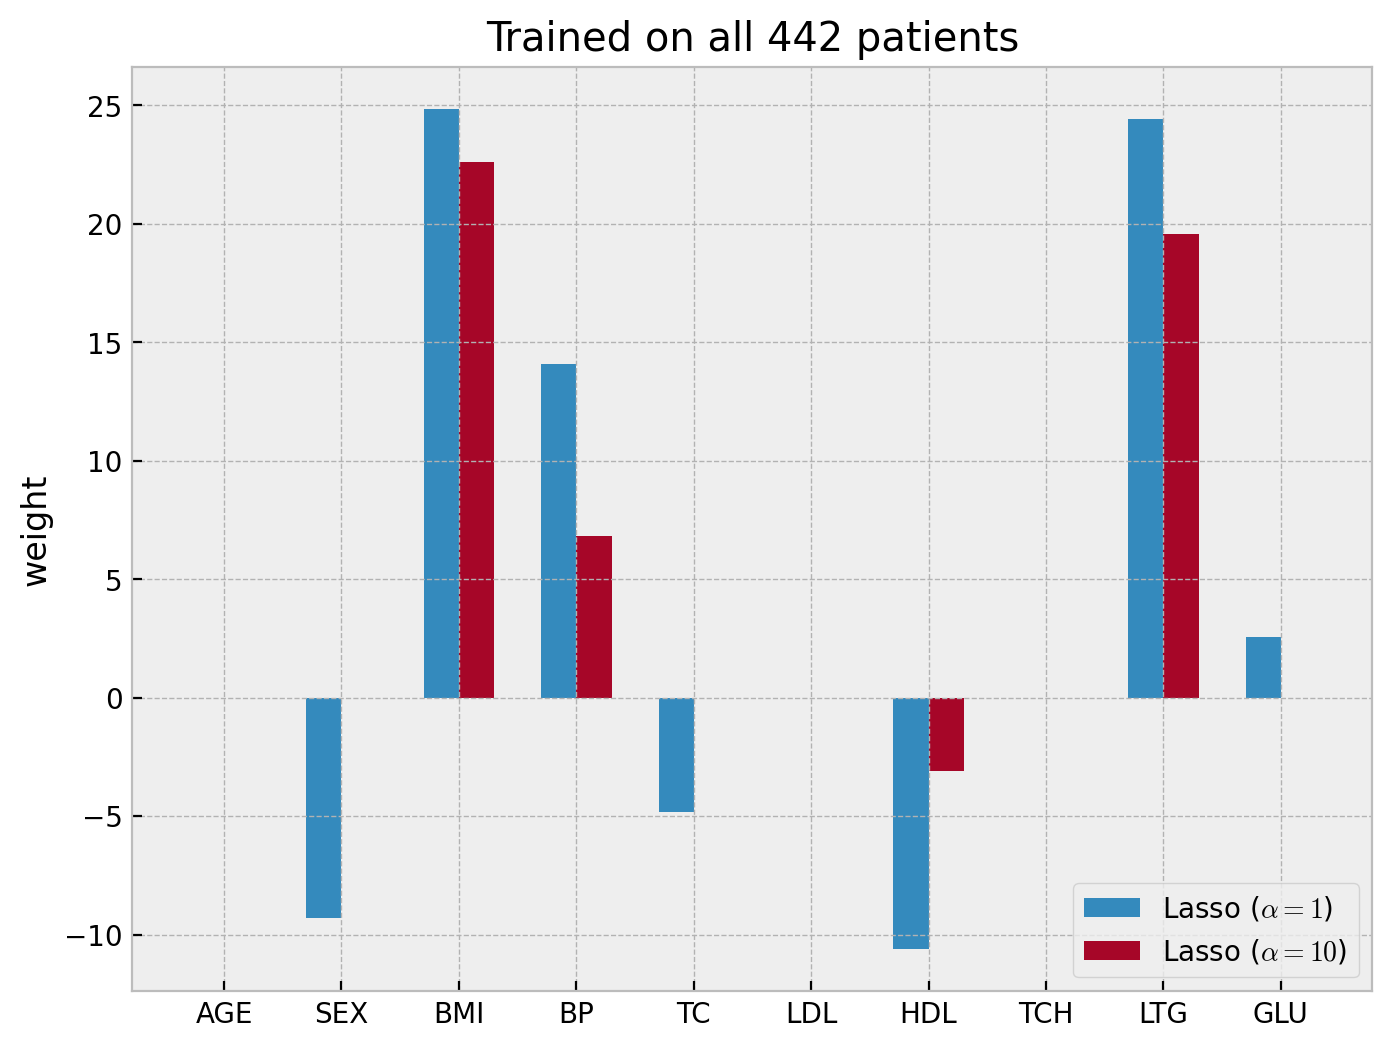

In [33]:
n = len(lasso_model_a1.coef_)
plt.bar(np.arange(n)-0.15, lasso_model_a1.coef_, width=0.3, label=r'Lasso ($\alpha = 1$)')
plt.bar(np.arange(n)+0.15, lasso_model_a10.coef_, width=0.3, label=r'Lasso ($\alpha = 10$)')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title('Trained on all 442 patients')
plt.legend();

### Elastic Net Regularization

An Elastic Net regression model seeks the weights ($\beta_i$) that minimize $RSS + \alpha_1 \sum_i{\left|\beta_i\right|} + \alpha_2 \sum_i{\beta_i^2}$.

In [34]:
from sklearn.linear_model import ElasticNet

enet_model = ElasticNet(alpha=1, l1_ratio=0.5)  # L1=0.5 (lasso), L2=0.5 (ridge)
enet_model.fit(Xs, y)

lasso_model = Lasso(alpha=1)
lasso_model.fit(Xs, y)

ridge_model = Ridge(alpha=10)
ridge_model.fit(Xs, y);

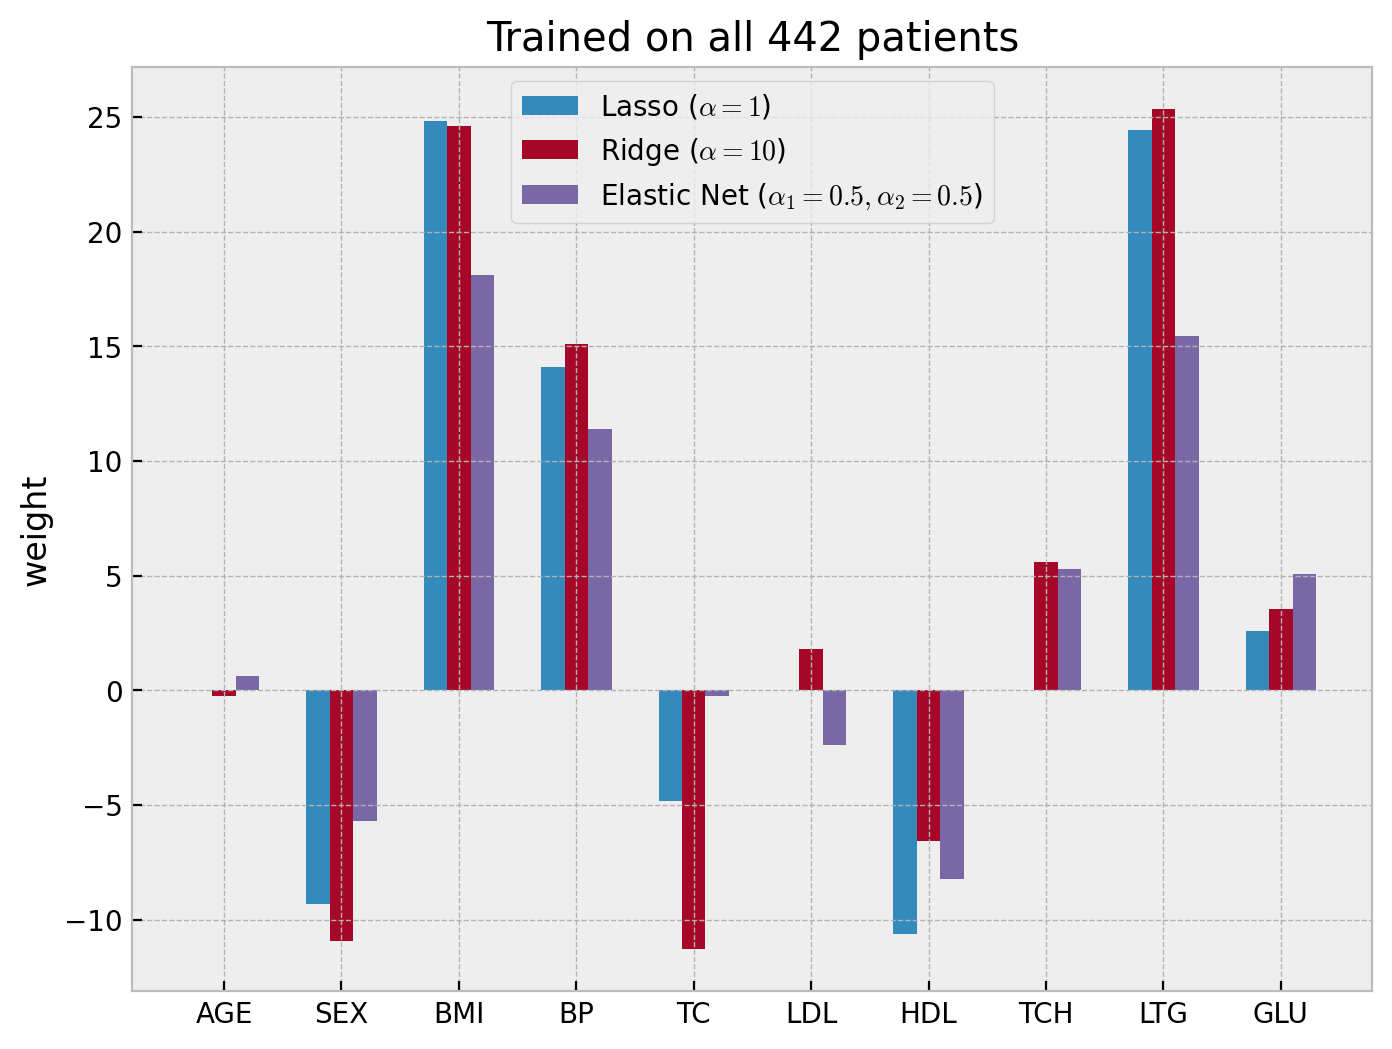

In [35]:
n = len(enet_model.coef_)
plt.bar(np.arange(n)-0.2, lasso_model.coef_, width=0.2, label=r'Lasso ($\alpha = 1$)')
plt.bar(np.arange(n)+0.0, ridge_model.coef_, width=0.2, label=r'Ridge ($\alpha = 10$)')
plt.bar(np.arange(n)+0.2, enet_model.coef_, width=0.2, label=r'Elastic Net ($\alpha_1 = 0.5, \alpha_2 = 0.5$)')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title('Trained on all 442 patients')
plt.legend();

<img src="images/lasso-ridge-enet.png">

### Tuning the regularization hyperparameter

By choosing a particular $\alpha$, you are choosing a particular model (e.g., `Ridge(alpha=3)` vs. `Ridge(alpha=5)`).

How will you decide which regularization hyperparamter (i.e., model) is the best?

*Hint: You want a model that both fits the data well and generalizes to new data it was not trained on.*

Apply 5-fold cross validation in order to select the best Ridge model (i.e., best $\alpha$).

In [36]:
from sklearn.model_selection import cross_validate
from sklearn.utils import shuffle

# cross_validate DOES NOT shuffle the data by default.
# this is so we can evaluate each model (alpha) on the exact same data partitioning
Xs_shuffled, y_shuffled = shuffle(Xs, y, random_state=0)

K = 5
alphas = np.logspace(-5, 3, 50)
cv_score = np.zeros([len(alphas), K])

for i, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    cv_results = cross_validate(ridge, Xs_shuffled, y_shuffled, cv=K, scoring='r2')
    cv_score[i] = cv_results['test_score']

In [37]:
cv_score

array([[0.3322332 , 0.45970428, 0.53706367, 0.52165389, 0.59511988],
       [0.33223319, 0.45970429, 0.53706367, 0.52165388, 0.59511991],
       [0.33223318, 0.4597043 , 0.53706366, 0.52165386, 0.59511996],
       [0.33223317, 0.45970432, 0.53706364, 0.52165384, 0.59512004],
       [0.33223315, 0.45970436, 0.53706362, 0.52165381, 0.59512015],
       [0.33223312, 0.4597044 , 0.53706359, 0.52165376, 0.59512031],
       [0.33223307, 0.45970447, 0.53706355, 0.52165369, 0.59512054],
       [0.332233  , 0.45970457, 0.53706349, 0.52165359, 0.59512087],
       [0.33223291, 0.45970471, 0.5370634 , 0.52165345, 0.59512136],
       [0.33223276, 0.45970492, 0.53706327, 0.52165324, 0.59512208],
       [0.33223256, 0.45970523, 0.53706309, 0.52165294, 0.59512312],
       [0.33223225, 0.45970567, 0.53706281, 0.52165249, 0.59512463],
       [0.33223181, 0.45970632, 0.53706241, 0.52165185, 0.59512683],
       [0.33223117, 0.45970726, 0.53706183, 0.52165091, 0.59513004],
       [0.33223024, 0.45970864, 0.

In [38]:
cv_score_mean = cv_score.mean(axis=1)
cv_score_std = cv_score.std(axis=1)

best_index = np.argmax(cv_score_mean)
best_alpha = alphas[best_index]

best_alpha

1.6768329368110066

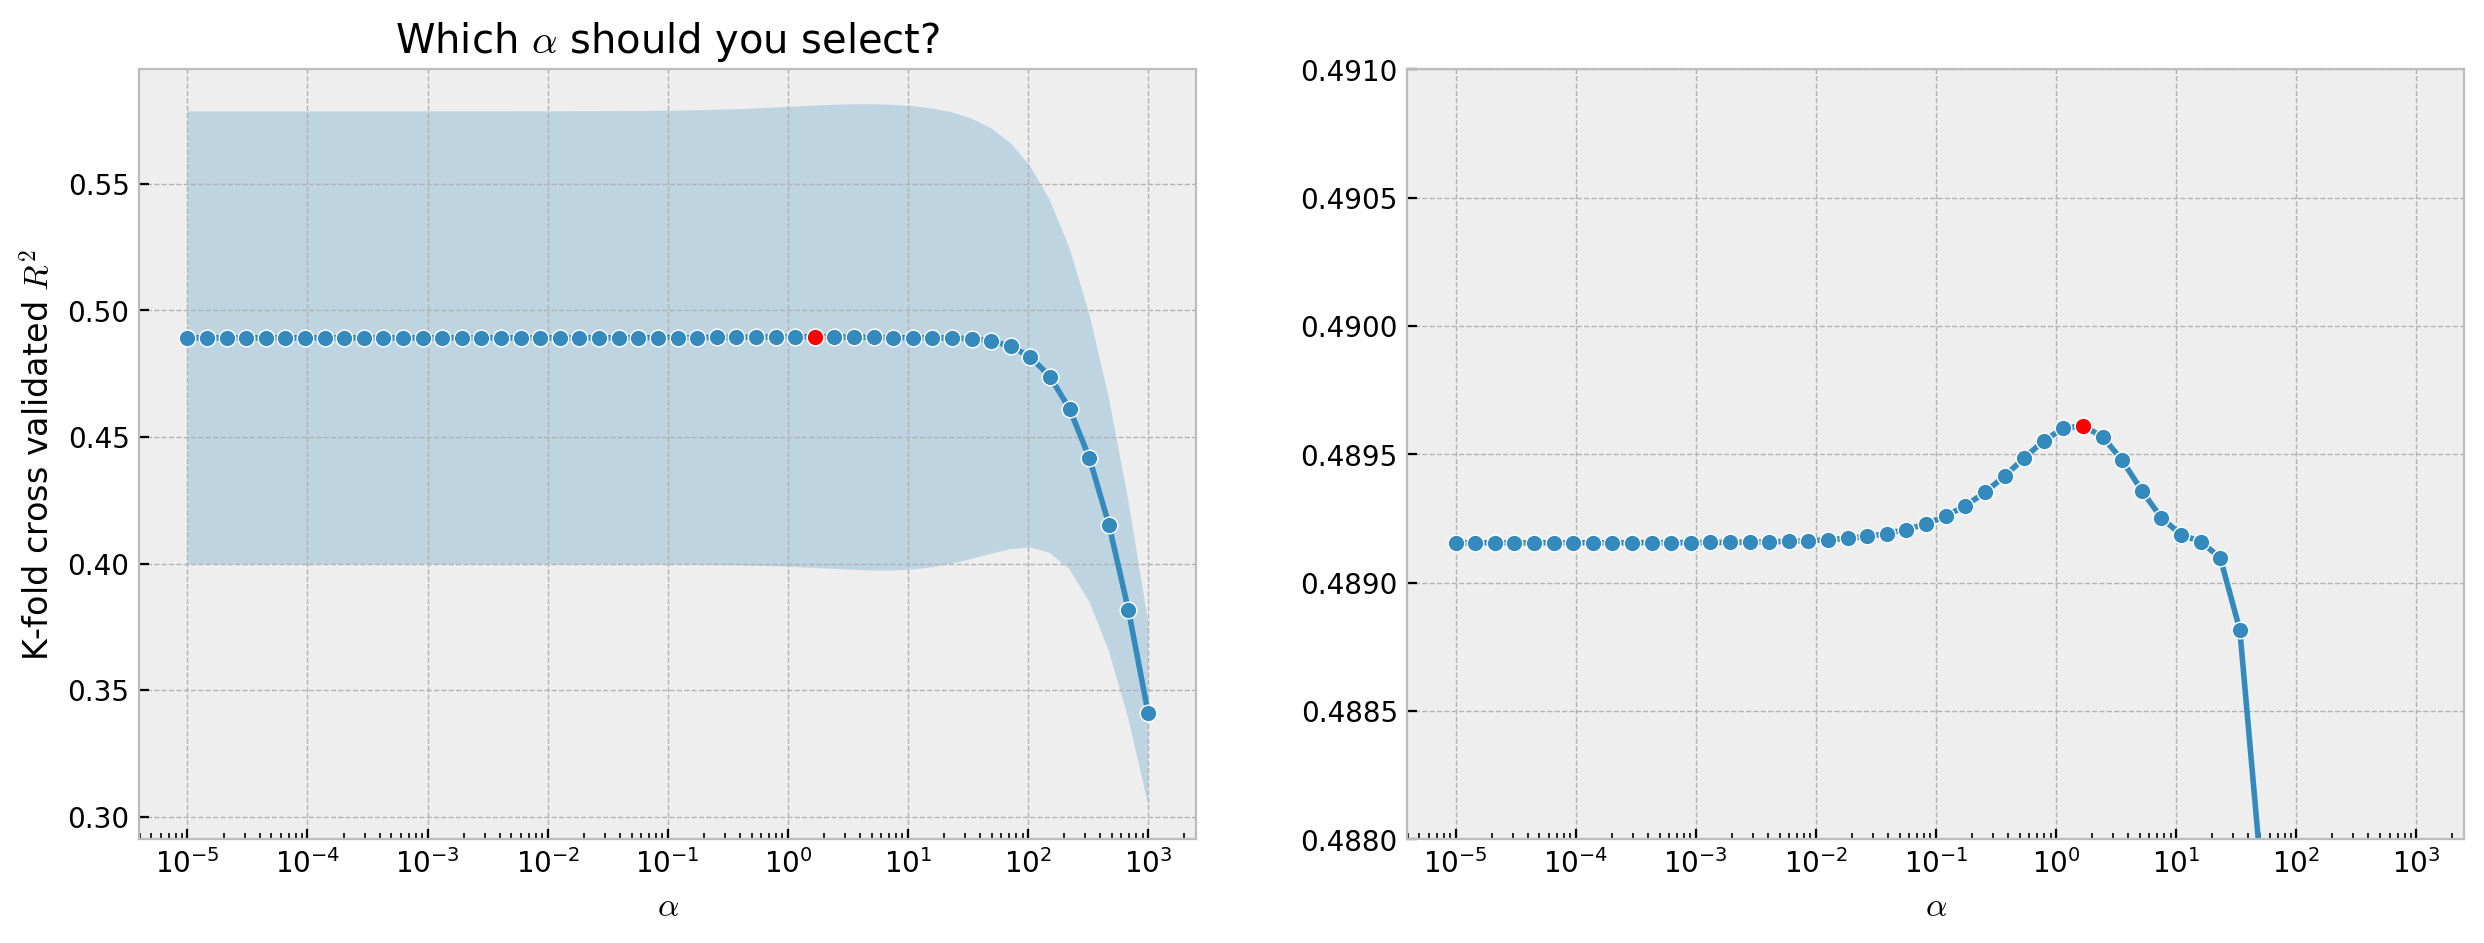

In [39]:
# cross validated score w/ standard deviation envelope
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(alphas, cv_score_mean, 'o-')
plt.plot(best_alpha, cv_score_mean[best_index], 'ro')
plt.fill_between(alphas, cv_score_mean - cv_score_std, cv_score_mean + cv_score_std, alpha=0.25)
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('K-fold cross validated $R^2$')
plt.title(r'Which $\alpha$ should you select?')

plt.subplot(122)
plt.plot(alphas, cv_score_mean, 'o-')
plt.plot(best_alpha, cv_score_mean[best_index], 'ro')
plt.ylim([0.488, 0.491])
plt.xscale('log')
plt.xlabel(r'$\alpha$');

From the above plot all $\alpha$ from ~0-80 are all about equally as good.

If that's true, then which $\alpha$ from 0-80 should you choose and why?

The `RidgeCV` class wraps this up for you nice and neat.

In [40]:
from sklearn.linear_model import RidgeCV

# RidgeCV DOES NOT shuffle the data
Xs_shuffled, y_shuffled = shuffle(Xs, y, random_state=0)

alphas = np.logspace(-5, 3, 50)
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(Xs_shuffled, y_shuffled)

ridge_cv.alpha_

1.6768329368110066

In the above code, try shuffling the data using a different random seed.

Does it make a difference for your selected model?

In [41]:
best_ridge_model = Ridge(alpha=ridge_cv.alpha_)

In [42]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

alphas = np.logspace(-5, 3, 50)

ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(Xs, y)

lasso_cv = LassoCV(alphas=alphas)
lasso_cv.fit(Xs, y)

enet_cv = ElasticNetCV(alphas=alphas)
enet_cv.fit(Xs, y)

ridge_cv.alpha_, lasso_cv.alpha_, enet_cv.alpha_

(1.6768329368110066, 0.08286427728546843, 0.0013257113655901081)

Exhaustive grid search over parameter space for any type of model.

In [43]:
from sklearn.model_selection import GridSearchCV

# pre-shuffle rows
Xs_shuffled, y_shuffled = shuffle(Xs, y, random_state=0)

params = {'alpha': np.logspace(-3, 1.5, 30)}
model = Lasso()
grid_cv = GridSearchCV(model, params, cv=10, scoring='neg_mean_squared_error')
grid_cv.fit(Xs_shuffled, y_shuffled)
best_alpha = grid_cv.best_params_['alpha']
best_model = grid_cv.best_estimator_

best_model

Lasso(alpha=0.887719708898587)

In [44]:
# mean cross-validated test score for each alpha
grid_cv.cv_results_['mean_test_score']

array([-2985.24718414, -2985.25203231, -2985.25934192, -2985.27045595,
       -2985.28781758, -2985.31555598, -2985.36120969, -2985.35778074,
       -2985.13779765, -2984.57139512, -2984.2152476 , -2983.7549679 ,
       -2983.4796126 , -2984.08181842, -2987.84428934, -2990.40322899,
       -2986.86681037, -2985.00643763, -2983.205588  , -2981.61750607,
       -2982.2016189 , -2993.55163359, -3015.12317464, -3043.20727059,
       -3101.82534885, -3176.17072677, -3295.24811576, -3530.6297478 ,
       -3932.11464344, -4654.361307  ])

In [45]:
# standard deviation of cross-validated test scores for each alpha
grid_cv.cv_results_['std_test_score']

array([472.49218481, 472.48321027, 472.47049617, 472.45248471,
       472.4271676 , 472.39164308, 472.34245278, 472.21052348,
       471.92853647, 472.00197925, 471.93558442, 471.67287329,
       471.07351551, 469.98704405, 469.06763394, 468.21774207,
       466.13578286, 461.79283883, 454.99405802, 446.07619735,
       434.50029689, 419.09946806, 399.07446576, 377.34176617,
       357.83977031, 354.84219598, 348.99641613, 351.08339267,
       381.37447574, 503.28450874])

Non-exhaustive randomized search across parameter space (much faster when parameter space is huge).

In [46]:
from sklearn.model_selection import RandomizedSearchCV

# pre-shuffle rows
Xs_shuffled, y_shuffled = shuffle(Xs, y, random_state=0)

params = {'alpha': np.logspace(-3, 1.5, 30000)}
model = Lasso()
rand_cv = RandomizedSearchCV(model, params, cv=10, scoring='neg_mean_squared_error')
rand_cv.fit(Xs_shuffled, y_shuffled)
best_alpha = rand_cv.best_params_['alpha']
best_model = grid_cv.best_estimator_

best_model

Lasso(alpha=0.887719708898587)

![Data_Cortex_Nuclear](images/mice-protein-expression.png)

https://www.kaggle.com/ruslankl/mice-protein-expression/version/1

In [47]:
df = pd.read_csv("data/Data_Cortex_Nuclear.csv")
df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


Let's use the expression of all the other 76 proteins to predict the expression of BDNF.

In [48]:
proteins = df.loc[:,'DYRK1A_N':'CaNA_N']
proteins

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.275547,0.190483,NaN,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.283207,0.190463,NaN,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.290843,0.216682,NaN,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.306701,0.222263,NaN,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031


Fill in missing values...

In [49]:
X = proteins.fillna(proteins.mean())
X

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.134762,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.134762,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.134762,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.134762,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.134762,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.275547,0.190483,0.134762,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.283207,0.190463,0.134762,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.290843,0.216682,0.134762,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.306701,0.222263,0.134762,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031


In [50]:
y = X[['BDNF_N']]
y

,BDNF_N
0,0.430175
1,0.411770
2,0.418309
3,0.358626
4,0.358802
...,...
1075,0.254860
1076,0.251638
1077,0.234118
1078,0.243974


In [51]:
del X['BDNF_N']
X

,DYRK1A_N,ITSN1_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,...,0.188852,0.122652,0.134762,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,...,0.200404,0.116682,0.134762,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,...,0.193685,0.118508,0.134762,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,...,0.192112,0.132781,0.134762,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,...,0.205604,0.129954,0.134762,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,0.265642,...,0.275547,0.190483,0.134762,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823
1076,0.272198,0.474163,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,0.270378,...,0.283207,0.190463,0.134762,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478
1077,0.228700,0.395179,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,0.255045,...,0.290843,0.216682,0.134762,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825
1078,0.221242,0.412894,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,0.230649,...,0.306701,0.222263,0.134762,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031


Shuffle the rows...

In [52]:
X_shuffled, y_shuffled = shuffle(X, y, random_state=0)

In [53]:
X_shuffled

,DYRK1A_N,ITSN1_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
904,0.581233,0.805369,2.322274,4.149930,0.173610,0.141319,2.052805,0.189692,1.577308,0.804483,...,0.198386,0.129034,0.108696,0.116498,0.124233,0.401507,0.096426,0.146306,0.130101,1.476127
934,0.627634,0.780771,2.299913,3.990897,0.211498,0.161741,2.580995,0.208380,1.391445,0.624392,...,0.233503,0.156110,0.119915,0.116898,0.116972,0.554550,0.187597,0.171265,0.204958,1.800044
692,0.774384,1.046803,2.586188,4.151429,0.222780,0.169212,5.681431,0.235108,1.637246,1.013746,...,0.224179,0.146115,0.110637,0.109957,0.121083,0.448483,0.180172,0.142407,0.172508,1.655108
535,0.225014,0.385841,1.996554,3.016944,0.218983,0.155370,2.514503,0.170735,1.048535,0.274555,...,0.249223,0.163147,0.143638,0.134634,0.168185,0.454711,0.160146,0.189409,0.261014,1.460178
678,0.464630,0.666582,2.701699,4.782074,0.234533,0.182302,4.119675,0.218940,1.329234,0.685598,...,0.210038,0.140409,0.105798,0.112978,0.113316,0.512327,0.113926,0.149485,0.149282,1.946491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0.287620,0.402882,2.049893,2.749733,0.274013,0.196638,3.827375,0.186766,1.285486,0.346318,...,0.205251,0.191298,0.167442,0.098275,0.173443,0.328882,0.237809,0.183135,0.255964,0.754839
763,0.351955,0.604150,2.457302,3.810056,0.316308,0.229316,4.424049,0.248470,1.442671,0.342910,...,0.300950,0.220828,0.174046,0.151461,0.168130,0.482882,0.266535,0.267073,0.313856,1.173149
835,0.390427,0.584183,1.953174,3.424142,0.219771,0.168158,4.220187,0.191467,1.336316,0.450156,...,0.254838,0.148576,0.134992,0.136314,0.139800,0.368915,0.150980,0.201467,0.174059,0.963337
559,0.242445,0.378722,2.405375,4.754544,0.236422,0.162262,5.482993,0.194268,0.899186,0.286941,...,0.245034,0.145640,0.119706,0.128777,0.122006,0.563143,0.202874,0.174449,0.183009,1.277292


In [54]:
y_shuffled

,BDNF_N
904,0.295302
934,0.331712
692,0.353698
535,0.250574
678,0.377916
...,...
1033,0.361793
763,0.378558
835,0.284912
559,0.349615


# Exercise
Perform a GridSearch to find the best Ridge model to describe the relation between the expression of all the other 76 proteins to predict the expression of BDNF.

In [55]:
# from sklearn.linear_model import Ridge
# from sklearn.model_selection import GridSearchCV

# # 1. create the model...
# model = ...

# # 2. define the parameter grid to be searched...
# alphas = np.linspace(0, 0.3, 20)
# params = ...

# # 3. setup a grid search with 5-fold cross validation...
# cv = ...

# # 4. perform the grid search on the shuffled data...
# ...

# # 5. get the optimal parameters and model
# best_alpha = cv.best_params_['alpha']
# best_model = cv.best_estimator_

# best_model

# Exercise key
Perform a GridSearch to find the best Ridge model to describe the relation between the expression of all the other 76 proteins to predict the expression of BDNF.

In [100]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# 1. create the model...
model = Ridge()

# 2. define the parameter grid to be searched...
alphas = np.linspace(0.01, 0.3, 20)
params = {'alpha': alphas}

# 3. setup a grid search with 5-fold cross validation...
cv = GridSearchCV(model, params, cv=5)

# 4. perform the grid search on the shuffled data...
cv.fit(X_shuffled, y_shuffled)

# 5. get the optimal parameters and model
best_alpha = cv.best_params_['alpha']
best_model = cv.best_estimator_

best_model

Ridge(alpha=0.10157894736842105)

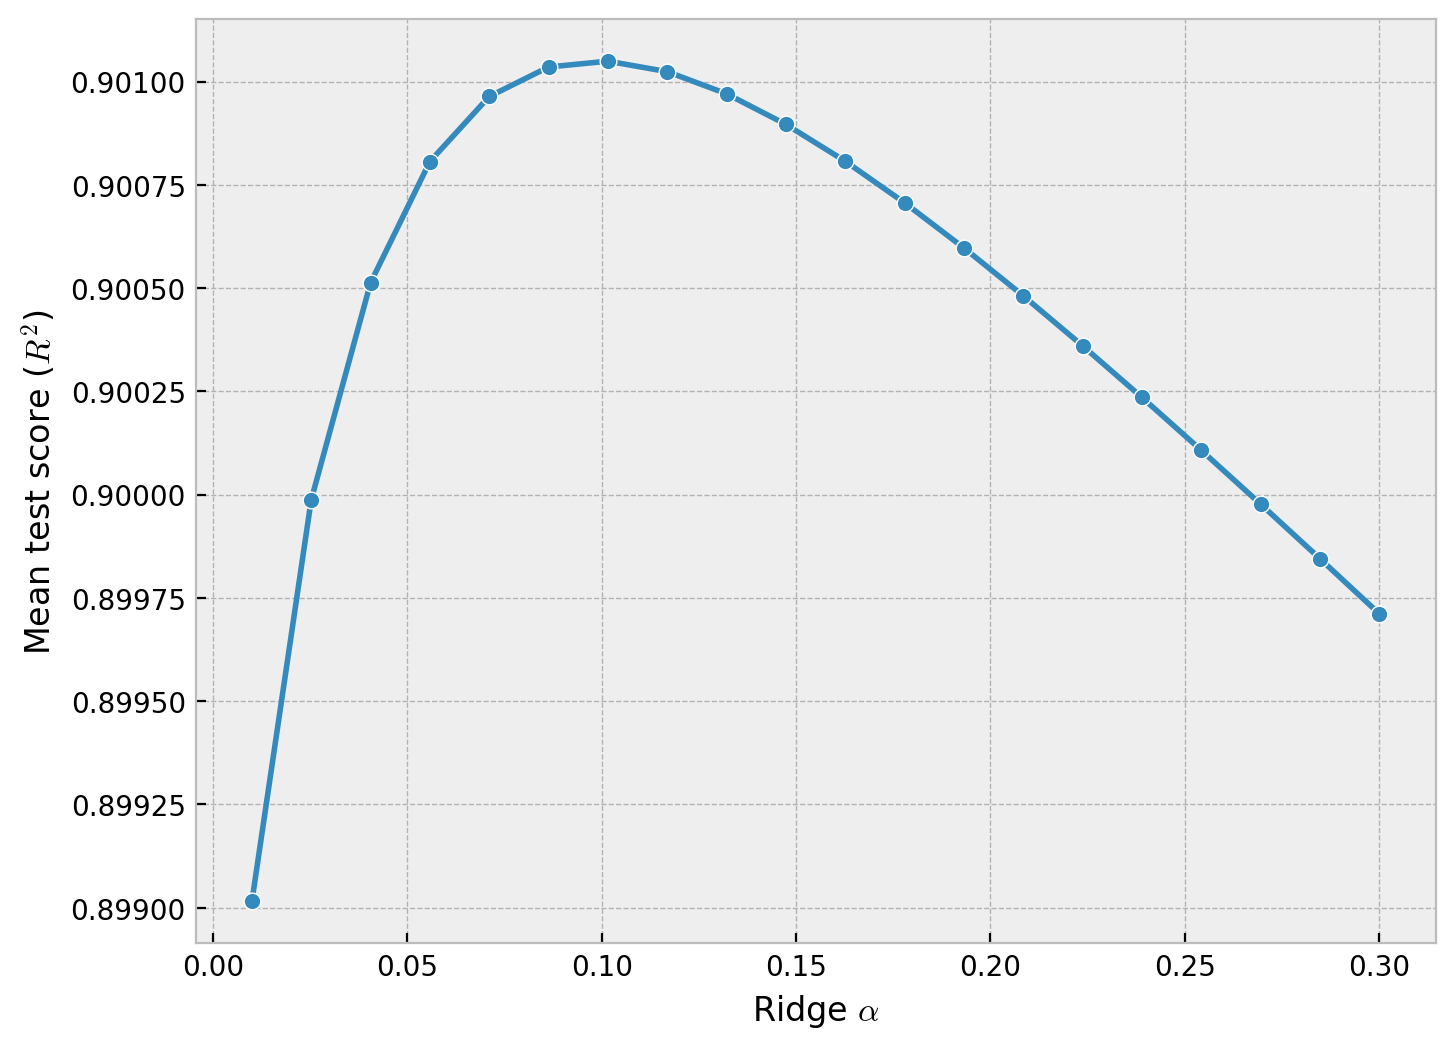

In [101]:
test_scores_per_alpha = cv.cv_results_['mean_test_score']

plt.plot(alphas, test_scores_per_alpha, 'o-')
plt.xlabel(r'Ridge $\alpha$')
plt.ylabel(r'Mean test score ($R^2$)');